In [1]:
import numpy as np
import sklearn.metrics as error
from Functions import DataHandler
from sklearn.model_selection import train_test_split

# Exercise 34
## 1: Setting up various python environments
Here's the recommended list from the exercise:

>pip3 install numpy scipy matplotlib ipython scikit-learn sympy pandas pillow

Scipy and scikit-learn failed initially because some underlying packages were missing.
Installed miniconda and then got all packages to install in the correct environment.

## 2: Making your own data and exploring scikit-learn



In [2]:
#s 100 data points, defined by random numbers computed with the normal distribution
#Function y(x) is a quadratic polynomial with added stochastic noise
x = np.random.rand(100,1)
y = 2.0+5*x*x+0.1*np.random.randn(100,1)

scatterPlot = DataHandler(x, y)


### 2.1 Write your own code (following the examples under the regression notes) for computing the parametrization of the data set fitting a second-order polynomial.

I take this to mean that I should set up the model in terms of its parameters, (i.e. for a second order polynomial), and then calculate the best-fit coefficients, withouth using functions from scikit-learn.


Second order polynomial:
y(x) = ax^2 + bx + c, where a,b,c are the coefficients.

Need to determine values for a,b,c that will fit the data.
Best fitting means minimising the difference between the actual y-values in the data, and the ones in the model

####Design matrix
The equations for finding the constants, i.e. the 100 equations we get for each value of i (in yi = axi^2 + bxi + c).

This system of equations for solving the polynomial can be expressed as the matrix
Y = Xβ
where Y is a column vector containing all yi, 
X is a matrix with three columns: first  column contains x^2i, second xi, and third the constand (1 for c)
β is the column vector containg the coefficients [a,b,c]T

Below, I will need to find the best fitting line for the data (least squares method)
In the next exercises I will evaluate how well the model performs using mean squared error

####Least squares method
Mathematically done by solving 
β=(XTX)−1 XTY

From chatGPT:

Question:
>You are a teaching assistant helping me solve an exercise. I have vectors x and y, both with 100 elements. y is a a second order polynomial and a function of x. Using python, I need to compute the parametrization of the data set fitting a second-order polynomial. Where do I start?

The code in the answer:
>import numpy as np

>/# Assuming x and y are your vectors with 100 elements each
>/# x = np.array([...])
>/# y = np.array([...])
>
>/# Create the design matrix X
>X = np.column_stack((x**2, x, np.ones_like(x)))
>
>/# Compute the coefficients using the normal equation
>beta = np.linalg.inv(X.T @ X) @ (X.T @ y)
>
>/# The coefficients a, b, c
>a, b, c = beta


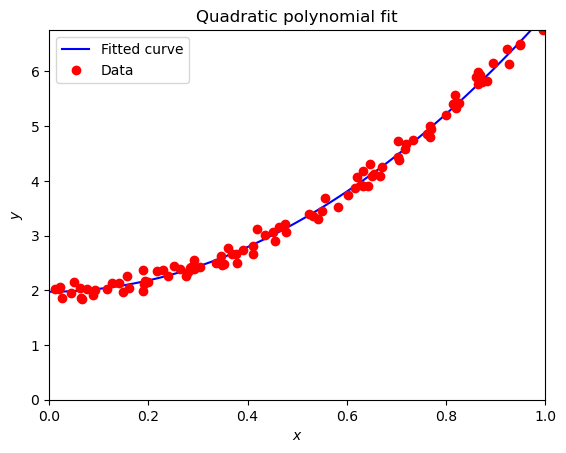

In [3]:

x_model = np.linspace(0, 1.0, 100)
yPredict = scatterPlot.Predict(x)
yPredict_sorted = scatterPlot.Predict(x_model)

scatterPlot.PlotDataWithFittedCurve(x_model, yPredict_sorted, 'Quadratic polynomial fit')

### 2.2 Use thereafter scikit-learn (see again the examples in the regression slides) and compare with your own code.

Do the same thing again, now using the scikit-learn library.

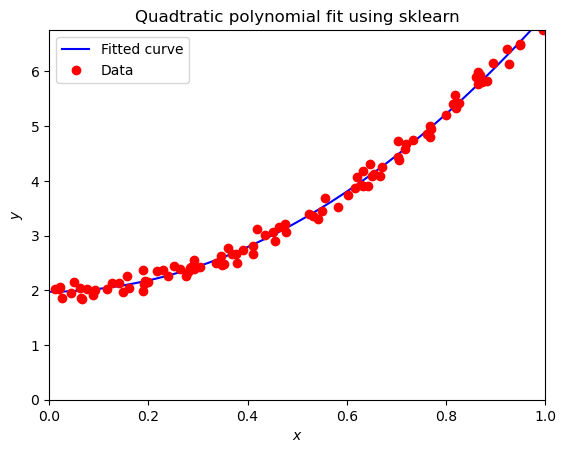

In [4]:
skLearnPredicted = scatterPlot.SkLearnPredict(2)
yPredicted = skLearnPredicted[1]

scatterPlot.PlotDataWithFittedCurve(skLearnPredicted[0], yPredicted, 'Quadtratic polynomial fit using sklearn')


### 2.3     Using scikit-learn, compute also the mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error.
You can use the functionality included in scikit-learn. If you feel for it, you can use your own program and define functions which compute the above two functions. Discuss the meaning of these results. Try also to vary the coefficient in front of the added stochastic noise term and discuss the quality of the fits.

I understand this to mean that I should now evaluate the model's fit to the data, experimenting with noise to see how this affect the results.

#### MSE

In [5]:
mse = error.mean_squared_error(y, yPredict)

print("mse = ", mse)

mse =  0.012245909546237492


#### R2

In [6]:
r2Score = error.r2_score(y, yPredict)

print(r2Score)

0.9938896696012812


Discuss the equations and results

In [7]:
#Varying the noise:
noise = (1, 0.5, 0.6, 0)

for n in noise:
    y = 2.0+5*x*x+0.1*np.random.randn(100,1)

    data = DataHandler(x, y)
    predictedY = data.Predict(x)

    #noiselessError = error.mean_squared_error(y, noiselessPredictedY)
    mse = error.mean_squared_error(y, predictedY)
    r2 = error.r2_score(y, predictedY)
    #print(n, ": ", round(r2, 5))

    print(n, ": ", round(mse, 5))



1 :  0.01225
0.5 :  0.00998
0.6 :  0.01195
0 :  0.00899


Better fit with less noise

## 3 Split data into test and training data

### 3a: 
Write a first code which sets up a design matrix defined by a fifth-order polynomial and split your data set in training and test data.



In [8]:
#Code from exercise, slightly rewritten:
def CreateDataSet(n):
    np.random.seed()

    # Make data set.
    x = np.linspace(-3, 3, n).reshape(-1, 1)
    y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

    return (x, y)

x, y = CreateDataSet(100)

In [9]:
#Create design matrix X defined by a fifth order polynomial
#fifth_handler = DataHandler(x, y)
#fifth_prediction = fifth_handler.SkLearnPredict(5)

X = np.column_stack((x**5, x**4, x**3, x**2, x, np.ones_like(x)))



#From lecture notes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



### 3b:
Write thereafter (using either scikit-learn or your matrix inversion code using for example numpy) and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial.


In [10]:

# matrix inversion to find beta
beta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
# and then make the prediction
ytilde = X_train @ beta

print("Training R2")
print(error.r2_score(y_train, ytilde))

print("Training MSE")
print(error.mean_squared_error(y_train,ytilde))

ypredict = X_test @ beta
print("Test R2")
print(error.r2_score(y_test,ypredict))
print("Test MSE")
print(error.mean_squared_error(y_test,ypredict))


#Split data into training and test sets

Training R2
0.9173366142421711
Training MSE
0.02301706332332283
Test R2
0.8934233941162164
Test MSE
0.01944276920584454


### 3c:

Add now a model which allows you to make polynomials up to degree 15. Perform a standard OLS fitting of the training data and compute the MSE for the training and test data and plot both test and training data MSE as functions of the polynomial degree. Compare what you see with Figure 2.11 of Hastie et al. Comment your results. For which polynomial degree do you find an optimal MSE (smallest value)?

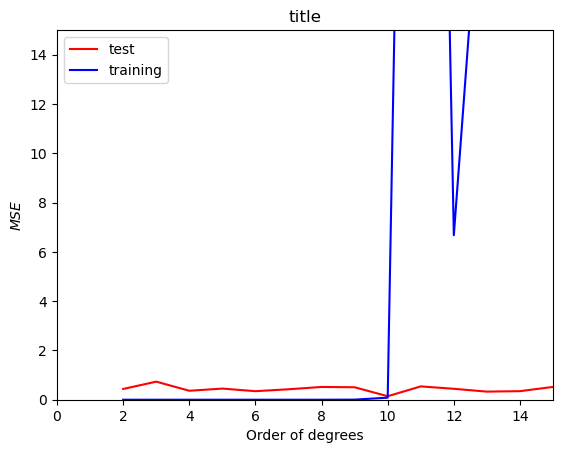

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


highOrderData = DataHandler(x, y)

def CreateFeatureMatrix(degree):
    data_points = np.column_stack((x, y))
    poly = PolynomialFeatures(degree, include_bias=False)

    poly_features = poly.fit_transform(data_points)

    return poly_features

y_axis_test = []
y_axis_training = []
x_axis = range(2, 16)

for order in x_axis:
    X = CreateFeatureMatrix(order)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    beta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    # and then make the prediction
    ytilde = X_train @ beta
    mse_training = error.mean_squared_error(y_train, ytilde)
    mse_test = error.mean_squared_error(y_test, ypredict)

    y_axis_training.append(mse_training)
    y_axis_test.append(mse_test)

trainingPlot = DataHandler(x_axis, y_axis_training)
testPlot = DataHandler(x_axis, y_axis_test)


plt.plot(x_axis, y_axis_test ,'r-', label='test')
plt.plot(x_axis, y_axis_training, 'b-', label='training')
plt.axis([0,15,0, 15])
plt.xlabel(r'Order of degrees')
plt.ylabel(r'$MSE$')
plt.title('title')
plt.legend()
plt.show()

